## Explainable AI (XAI) with a Decision Tree

Practical example for XAI analysis with Decision Tree visualization

* AI, Learning models become more and more complex over time and it becomes difficult to analyze them intuitively. 
* It is often heard that machine learning models are “black boxes”, in the sense that they can make good predictions but we can’t understand the logic behind those predictions. 
* This statement is true in the sense that most data scientists find it difficult to extract insights from models. 
* However, there are a few tools that we can use to extract insights from sophisticated machine learning models. 
* This example is a practical instruction of how to use and interpret the sklearn.tree.plot_tree for models explainability. A decision tree is an explainable machine learning algorithm all by itself and is used widely for feature importance of linear and non-linear models.
* It is a relatively simple model, and it is easily explained by visualizing the tree.

## Import Section

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

* In this example we will use the breast cancer example from sklearn datasets.
* It is a simple binary (Malignant, Benign) classification problem. 
* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

lets split the dataset to train and test, and use tree.DecisionTreeClassifier() to build the classification model.

In [ ]:
# import data and split
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
# model and fit
cls_t = tree.DecisionTreeClassifier()
cls_t.fit(X_train, y_train);

* Now, just to get a basic impression of the model, I recommend visualizing the feature importance. Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. 
* The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. 
* The higher the value the more important the feature. The most important features will be higher in the tree. A single feature can be used in different branches of the tree, feature importance then is its total contribution in reducing the impurity.

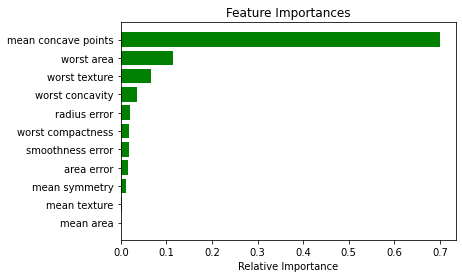

In [ ]:
importances = cls_t.feature_importances_
indices = np.argsort(importances)
features = cancer.feature_names
plt.title('Feature Importances')
j = 11 # top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
#plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

In this case only the top 11 features are being used. The other features are not being used. Their importance is zero.

In [ ]:
cls_t.feature_importances_

array([0.        , 0.0016609 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.01204155, 0.        ,
       0.01948008, 0.        , 0.        , 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06706044, 0.        , 0.11373562, 0.        ,
       0.01777943, 0.03441914, 0.        , 0.        , 0.        ])

## Tree

Let us visualize the first three levels of the decision tree, max_depth=3.

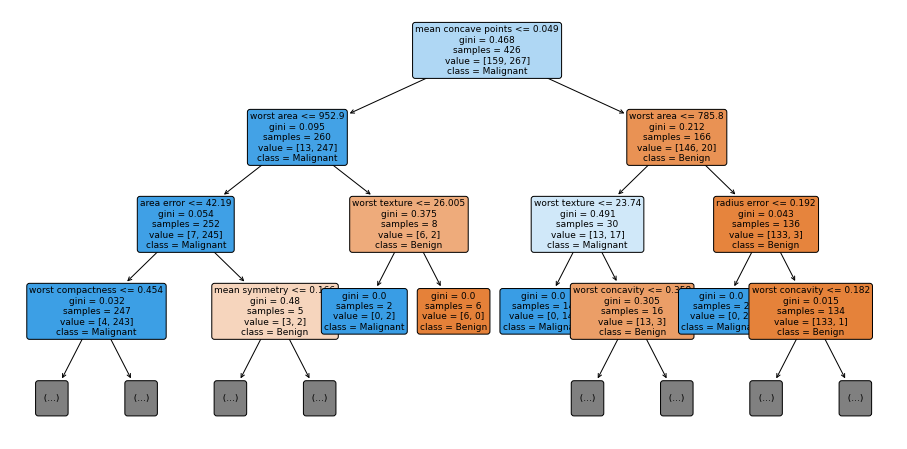

In [ ]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(cls_t, feature_names = cancer.feature_names, class_names = ['Benign', 'Malignant'], max_depth=3, fontsize=9, filled=True, 
              rounded=True)



## What can we learn about the model?

* First we can see for each decision level the name of the feature being used and the splitting value for the condition. 
* If a sample satisfies the condition, then it goes to the left branch, otherwise it goes to the right. 
* The samples line in each node shows us the number of samples we are examining in the current node. 
* If proportion=True, the number in the samples line are in units, % of the total dataset. 
* The value line in each node is telling us how many samples at that node fall into each class, in order when proportion=False and the proportion of samples when proportion=True. That's why, in each node, the numbers in value add up to the number shown in value for proportion=False and 1 for proportion=True.



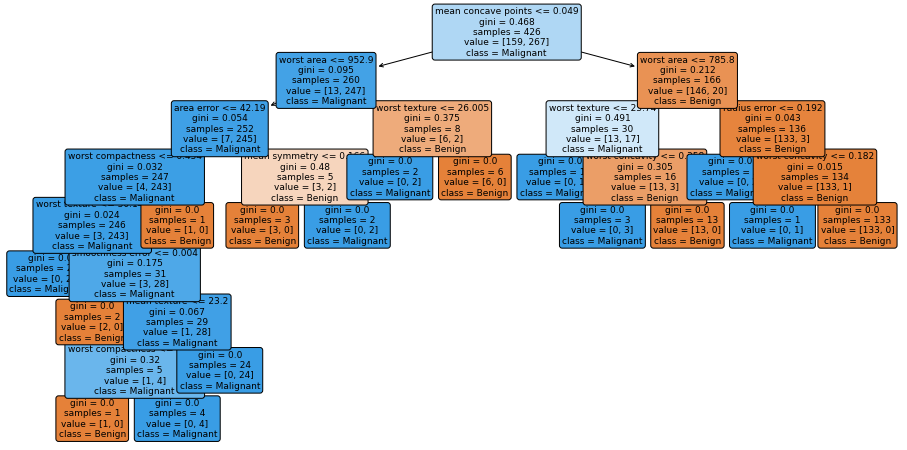

In [ ]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(cls_t, feature_names = cancer.feature_names, class_names = ['Benign', 'Malignant'], fontsize=9, filled=True, 
              rounded=True)

* In the class line we can see the classification result of the node. 
* The gini score is a metric that quantifies the purity of the node, similarly to entropy. A gini score greater than zero implies that samples contained within that node belong to different classes. 
* In the above figure the leaves have a gini score of zero, meaning that the samples in each leaf belong to a single class. Note that when purity is high the node/leaf has a darker color. 
* Decision Tree surrogate model One popular way to explain the global behavior of a “black box” model is to apply the global surrogate model. 
* A global surrogate model is an interpretable model that is trained to approximate the predictions of a black box model. We can draw conclusions about the black box model by interpreting the surrogate model. 
* Solving machine learning interpretability by using more machine learning ! Training a surrogate model is a model-agnostic method, since it does not require any information about the inner workings of the black box model, only access to data and the prediction function is necessary. 
## The idea is that we take our “black box” model and create predictions using it. Then we train a transparent model on the predictions produced by the “black box” model and the original features. Note that we need to keep track of how well the surrogate model approximates the “black-box” model but that is often not straightforward to determine. 
* Random Forest Classifier is a commonly used model that solves the overfit problem Decision Tree models tend to have. As a result has better accuracy on the test set but it is

In [ ]:
clf = RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=-1)
clf.fit(X_train, y_train);

Create predictions using your model (in this case a RandomForestClassifier)

In [ ]:
predictions = clf.predict(X_train)

In [ ]:
cls_t = tree.DecisionTreeClassifier()
cls_t.fit(X_train, predictions);


Now lets visualise

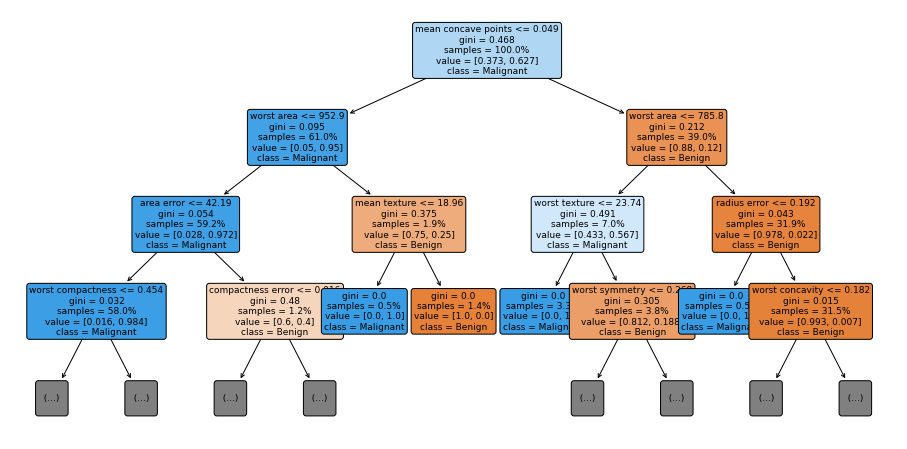

In [ ]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(cls_t, feature_names = cancer.feature_names, class_names = ['Benign', 'Malignant'], max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True)


* That’s it! Even if we cannot easily comprehend how the hundreds of trees in the forest look, we can build a shallow decision tree instead and hopefully get an idea of how the forest works. 
* Lastly, Measure how well the surrogate model replicates the predictions of the black box model. One way to measure how well the surrogate replicates the black box model is the R-squared measure.

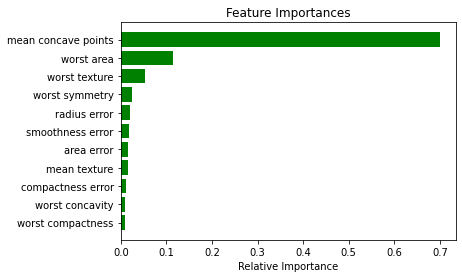

In [ ]:
importances = cls_t.feature_importances_
indices = np.argsort(importances)
features = cancer.feature_names
plt.title('Feature Importances')
j = 11 # top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
#plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
cls_t.score(X_train, predictions)

1.0

## Summary

* Explaining “black box” machine learning models is important for their successful applicability to many real world problems. 
* sklearn.tree.plot_tree is a visualization tool that can help us understand the model. Or in other words what did the machine (model) learn from the features? Does it match our expectations? Can we help the machine learn by adding more complex features using domain knowledge about the problem? Using decision tree visualization can help us assess the correctness of the model intuitively and perhaps even to improve it.